In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Main macroeconomic indicators of Surkhandarya region

/Users/david/Desktop/yesu/venv/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #NAME?.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


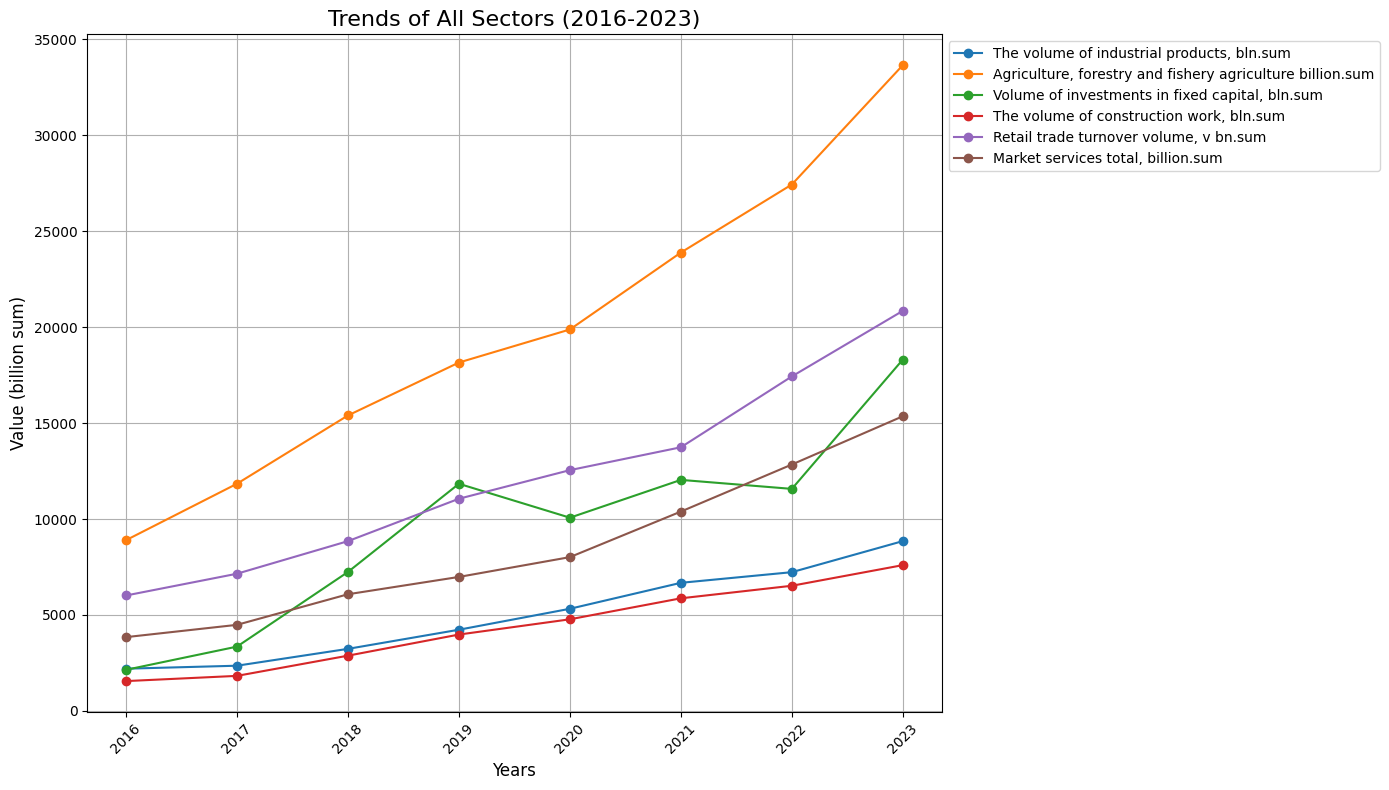

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and clean it
macro_data_cleaned = pd.read_excel('data.xlsx', sheet_name='1-macro', skiprows=3, skipfooter=2)

# Rename columns for consistency and clarity
macro_data_cleaned.columns = [
    'Sector', '2016', '2017', '2018', '2019', '2020', 
    '2021', '2022', '2023', 'Jan_Sep_2023', 'Jan_Sep_2022'
]

# Remove rows with all NaN values
macro_data_cleaned = macro_data_cleaned.dropna(how='all').reset_index(drop=True)

macro_data_cleaned = macro_data_cleaned.iloc[:-4].reset_index(drop=True)

# Define the years to analyze
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Plot trends for all sectors
plt.figure(figsize=(14, 8))

# Iterate through all sectors and plot their values
for i in range(1, len(macro_data_cleaned)):
    sector = macro_data_cleaned.iloc[i]
    sector_name = sector['Sector']
    try:
        values = sector[years].astype(float)  # Convert data to float for plotting
        plt.plot(years, values, marker='o', label=sector_name)
    except ValueError:
        continue  # Skip rows with invalid data

# Add plot titles and labels
plt.title('Trends of All Sectors (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Value (billion sum)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Adjust layout to ensure proper display of legend
plt.tight_layout()
plt.show()


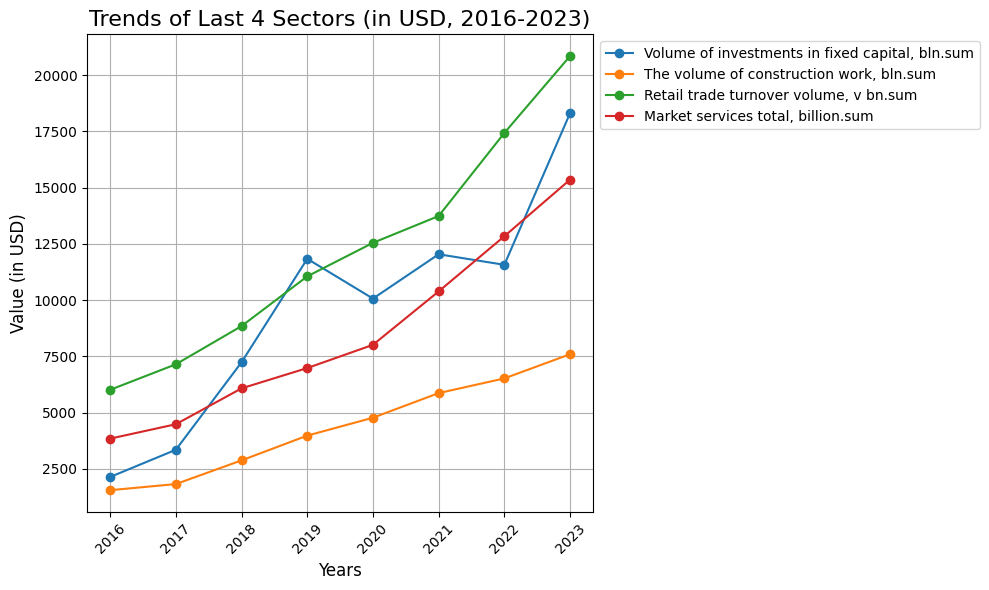

In [3]:
last_4_usd_sectors = macro_data_cleaned.iloc[-4:]

# Plotting these sectors in a separate plot
plt.figure(figsize=(10, 6))

for i in range(len(last_4_usd_sectors)):
    sector = last_4_usd_sectors.iloc[i]
    sector_name = sector['Sector']
    try:
        values = sector[years].astype(float)  # Convert data to float for plotting
        plt.plot(years, values, marker='o', label=sector_name)
    except ValueError:
        continue  # Skip rows with invalid data

# Add plot titles and labels
plt.title('Trends of Last 4 Sectors (in USD, 2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Value (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Adjust layout to ensure proper display of legend
plt.tight_layout()
plt.show()


/Users/david/Desktop/yesu/venv/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #NAME?.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


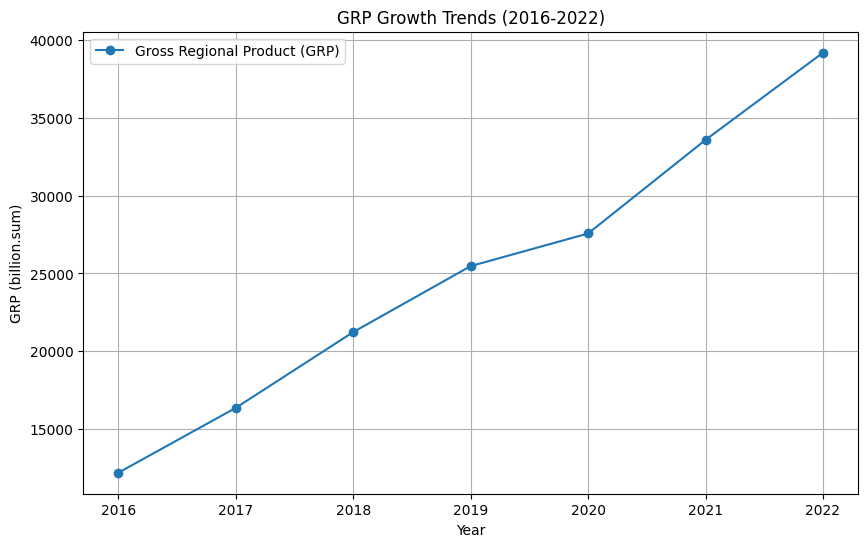

GRP Annual Growth Rates (%):
2016      NaN
2017    34.28
2018    29.81
2019    19.99
2020     8.24
2021    21.83
2022    16.70
Name: 1, dtype: float64
Projected GRP for 2023: 42497.60 billion.sum


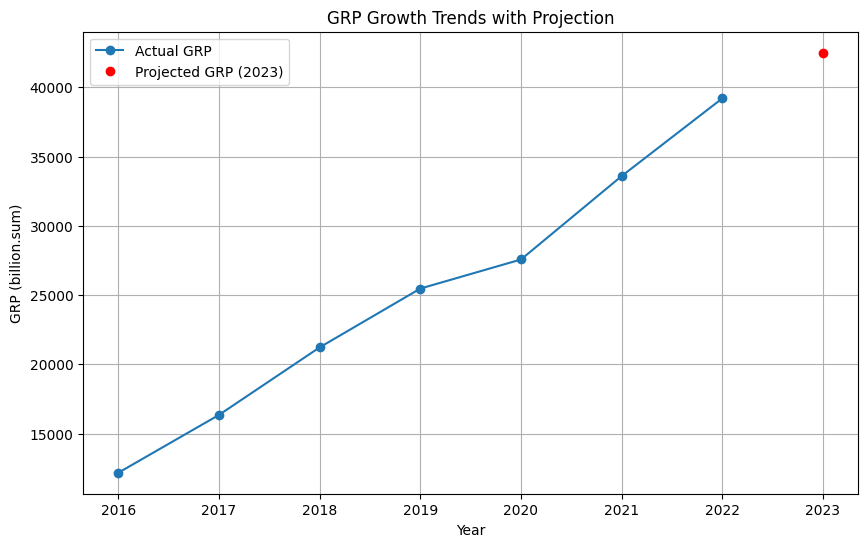

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and clean the data
macro_data_cleaned = pd.read_excel('data.xlsx', sheet_name='1-macro', skiprows=3, skipfooter=2)

# Rename columns for clarity
macro_data_cleaned.columns = ['Sectors', '2016', '2017', '2018', '2019', '2020', 
                              '2021', '2022', '2023 (est.)', 'Jan-Sep 2023', 
                              'Jan-Sep 2022']

# Drop rows where all values are NaN
macro_data_cleaned = macro_data_cleaned.dropna(how='all')

# Convert numeric columns to appropriate types, handling any non-numeric values
for col in macro_data_cleaned.columns[1:]:
    macro_data_cleaned[col] = pd.to_numeric(macro_data_cleaned[col], errors='coerce')

# Filter for relevant indicators
grp_data = macro_data_cleaned[macro_data_cleaned['Sectors'].str.contains("Gross regional product", na=False)]
cpi_data = macro_data_cleaned[macro_data_cleaned['Sectors'].str.contains("Consumer price index", na=False)]

# --- GRP Growth Trends ---
# Extract years and values
grp_years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
grp_values = grp_data.iloc[0][grp_years].astype(float)

# Plot GRP trend
plt.figure(figsize=(10, 6))
plt.plot(grp_years, grp_values, marker='o', label="Gross Regional Product (GRP)")
plt.title("GRP Growth Trends (2016-2022)")
plt.xlabel("Year")
plt.ylabel("GRP (billion.sum)")
plt.grid(True)
plt.legend()
plt.show()

# --- GRP Change Rates ---
grp_growth_rates = (grp_values.pct_change() * 100).round(2)  # Calculate annual growth rates
print("GRP Annual Growth Rates (%):")
print(grp_growth_rates)

# --- CPI Analysis ---
if not cpi_data.empty:
    cpi_years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
    cpi_values = cpi_data.iloc[0][cpi_years].astype(float)

    # Plot CPI trends
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_years, cpi_values, marker='o', color='orange', label="Consumer Price Index (CPI)")
    plt.title("CPI Trends (2016-2022)")
    plt.xlabel("Year")
    plt.ylabel("CPI (%)")
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Correlation Analysis ---
if not cpi_data.empty:
    combined_data = pd.DataFrame({'GRP': grp_values.values, 'CPI': cpi_values.values}, index=grp_years)
    correlation = combined_data.corr().loc['GRP', 'CPI']
    print(f"Correlation between GRP and CPI: {correlation:.2f}")

# --- Projections for GRP ---
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for linear regression
years_numeric = np.arange(len(grp_years)).reshape(-1, 1)  # Convert years to numeric values (0, 1, 2...)
model = LinearRegression()
model.fit(years_numeric, grp_values)

# Predict GRP for 2023
grp_2023_pred = model.predict([[len(grp_years)]])
print(f"Projected GRP for 2023: {grp_2023_pred[0]:.2f} billion.sum")

# Visualize GRP Projection
plt.figure(figsize=(10, 6))
plt.plot(grp_years, grp_values, marker='o', label="Actual GRP")
plt.plot(['2023'], grp_2023_pred, 'ro', label="Projected GRP (2023)")
plt.title("GRP Growth Trends with Projection")
plt.xlabel("Year")
plt.ylabel("GRP (billion.sum)")
plt.grid(True)
plt.legend()
plt.show()

# 2023

# 2. Share of key macroeconomic indicators of Surkhandarya  region

/Users/david/Desktop/yesu/venv/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #NAME?.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


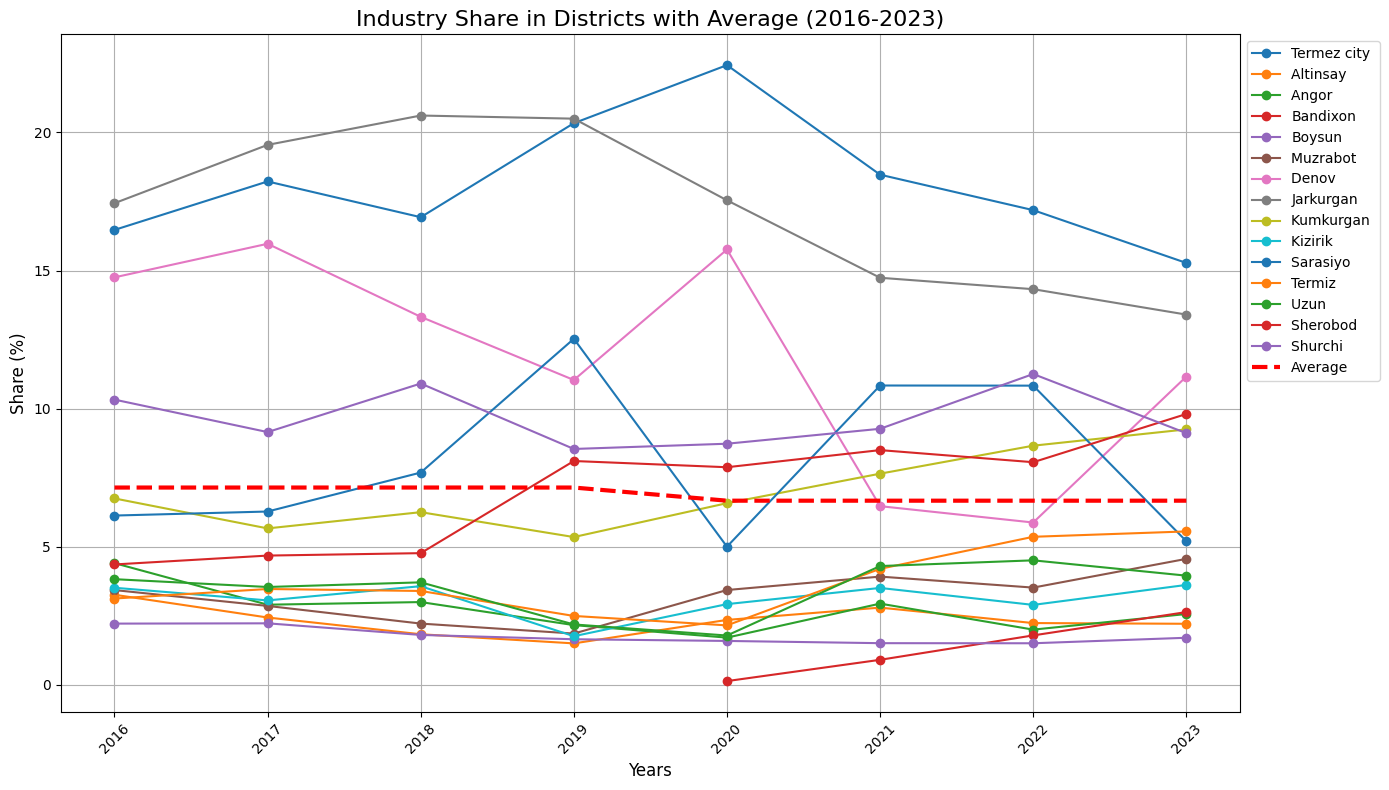

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and clean it
districts_data = pd.read_excel('data.xlsx', sheet_name='1.2 share of districts')

# Extract and clean the "Industry" data
industry_data = districts_data.iloc[4:, :9]  # Selecting rows and columns relevant to "Industry"
industry_data.columns = ['District', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
industry_data = industry_data.dropna(how='all').reset_index(drop=True)

# Convert numerical columns to float for plotting
for col in industry_data.columns[1:]:
    industry_data[col] = pd.to_numeric(industry_data[col], errors='coerce')

# Calculate the average for each year across all districts
average_values = industry_data.iloc[:, 1:].mean(axis=0)

# Plotting the "Industry" share for each district along with the average
plt.figure(figsize=(14, 8))

# Plot individual districts
for i in range(len(industry_data)):
    district = industry_data.iloc[i]
    district_name = district['District']
    values = district.iloc[1:].astype(float)
    plt.plot(industry_data.columns[1:], values, marker='o', label=district_name)

# Plot the average (make it wider for visibility)
plt.plot(industry_data.columns[1:], average_values, color='red', linewidth=3, linestyle='--', label='Average')

# Add plot titles and labels
plt.title('Industry Share in Districts with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()


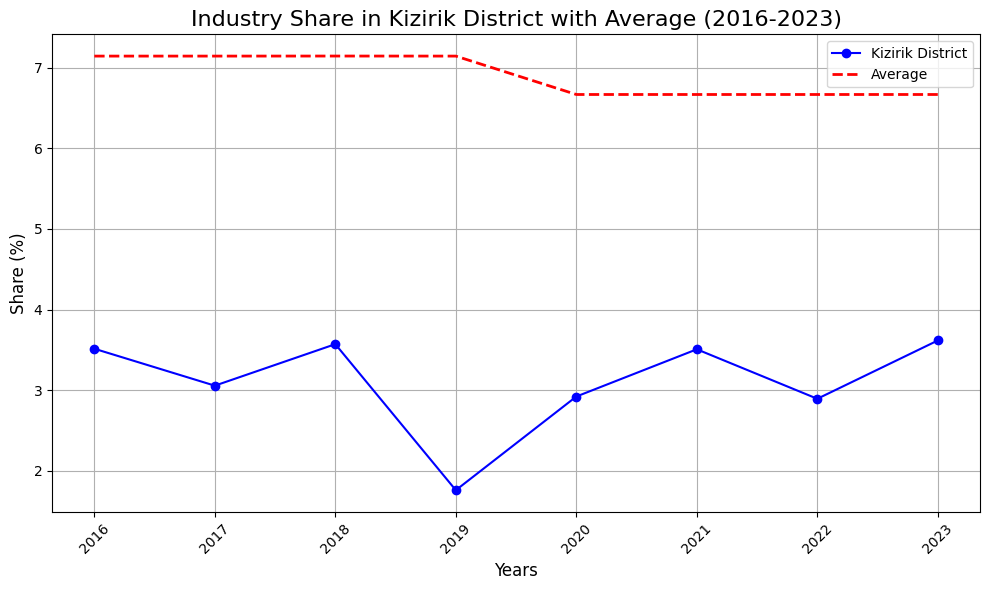

In [6]:
# Plot the "Industry" share for the Kizirik district with the average line

kizirik_data = industry_data[industry_data['District'].str.contains('Kizirik', case=False, na=False)]
plt.figure(figsize=(10, 6))

if not kizirik_data.empty:
    # Plot Kizirik district data
    values = kizirik_data.iloc[0, 1:].astype(float)
    plt.plot(industry_data.columns[1:], values, marker='o', label='Kizirik District', color='blue')
    
    # Plot the average line
    plt.plot(industry_data.columns[1:], average_values, color='red', linewidth=2, linestyle='--', label='Average')
else:
    print("Kizirik District data not found.")

# Add plot titles and labels
plt.title('Industry Share in Kizirik District with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


from the plot it's evident that the Industry share in the Kizirik District is much lower than an avarage value across the all districts

### Agriculture 

/Users/david/Desktop/yesu/venv/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #NAME?.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


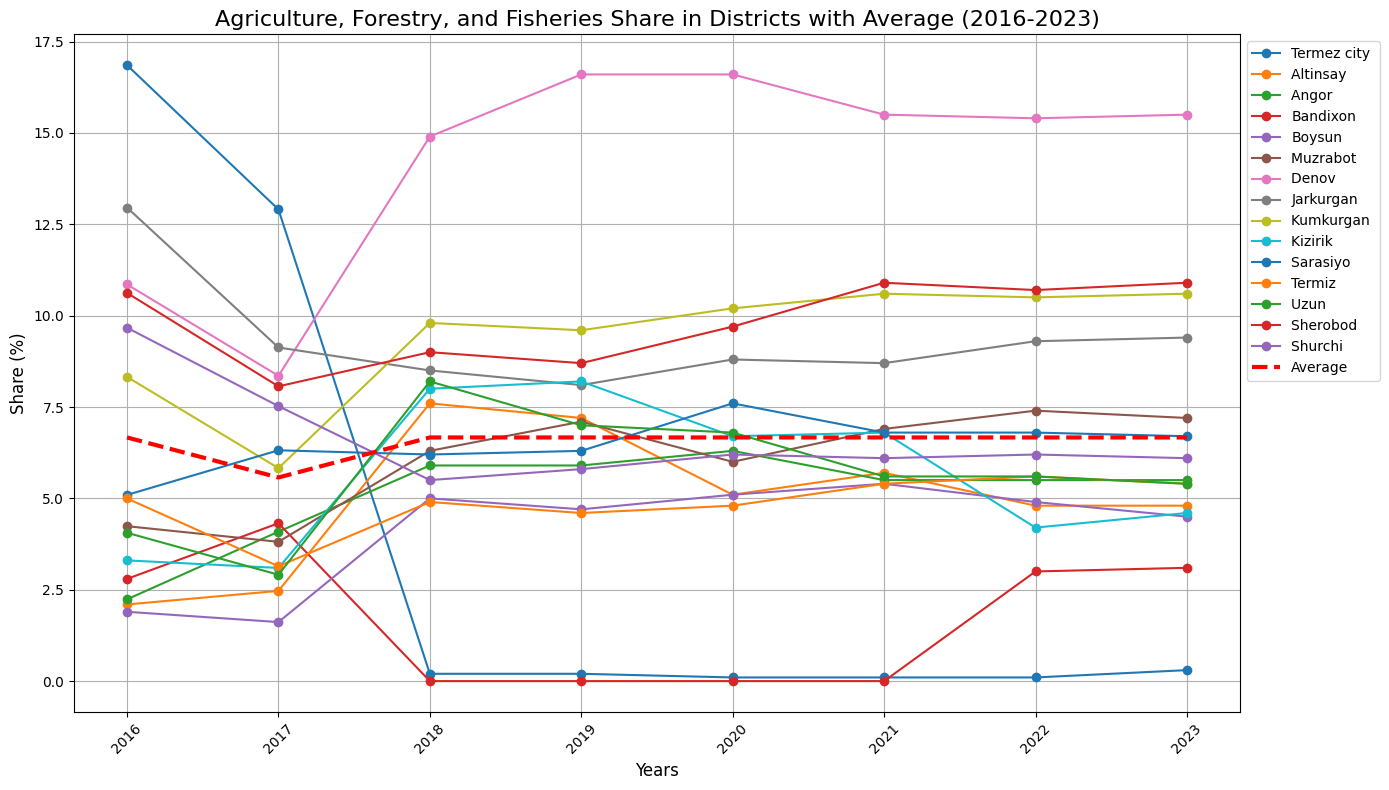

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the districts data (replace 'data.xlsx' with your file path)
districts_data = pd.read_excel('data.xlsx', sheet_name='1.2 share of districts')


# Extract and clean the "Agriculture, Forestry, and Fisheries" data
# Adjust row slicing to correctly capture district names
agriculture_data = districts_data.iloc[4:, [0, 9, 10, 11, 12, 13, 14, 15, 16]]  # Columns for districts and years
agriculture_data.columns = ['District', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
agriculture_data = agriculture_data.dropna(how='all').reset_index(drop=True)

# Ensure the District column contains valid strings
agriculture_data['District'] = agriculture_data['District'].astype(str)

# Convert numerical columns to float for plotting
for col in agriculture_data.columns[1:]:
    agriculture_data[col] = pd.to_numeric(agriculture_data[col], errors='coerce')

# Calculate the average for each year across all districts
agriculture_avg_values = agriculture_data.iloc[:, 1:].mean(axis=0)

# Plotting the "Agriculture, Forestry, and Fisheries" share for all districts
plt.figure(figsize=(14, 8))

# Plot individual districts
for i in range(len(agriculture_data)):
    district = agriculture_data.iloc[i]
    district_name = district['District']  # Use the district name as the label
    values = district.iloc[1:].astype(float)
    plt.plot(agriculture_data.columns[1:], values, marker='o', label=district_name)

# Plot the average (make it wider for visibility)
plt.plot(agriculture_data.columns[1:], agriculture_avg_values, color='red', linewidth=3, linestyle='--', label='Average')

# Add plot titles and labels
plt.title('Agriculture, Forestry, and Fisheries Share in Districts with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


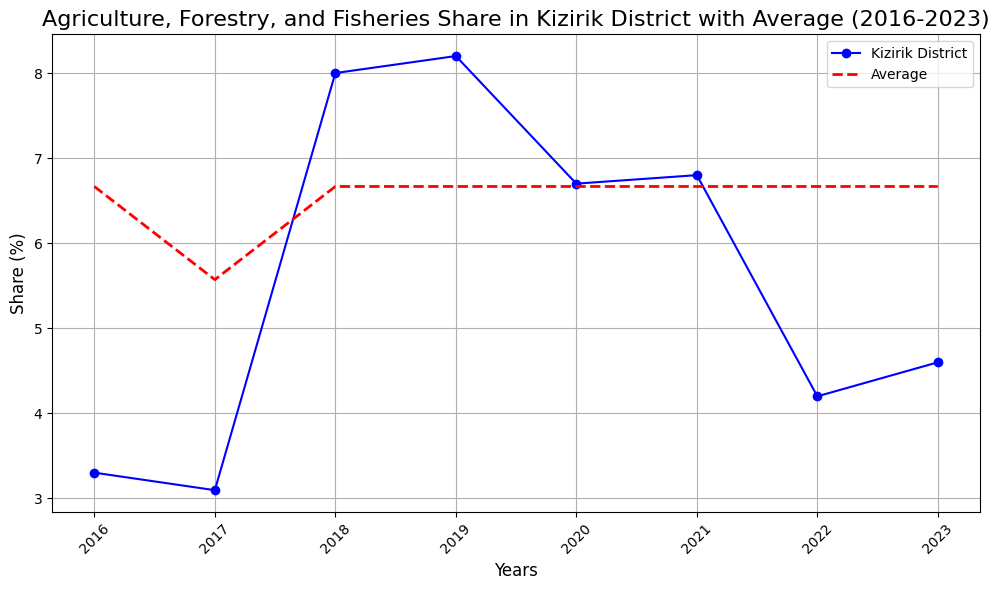

In [8]:
# Filter data for the Kizirik district
kizirik_data = agriculture_data[agriculture_data['District'].str.contains('Kizirik', case=False, na=False)]

# Plot the "Agriculture, Forestry, and Fisheries" share for the Kizirik district with the average line
plt.figure(figsize=(10, 6))

if not kizirik_data.empty:
    # Plot Kizirik district data
    values = kizirik_data.iloc[0, 1:].astype(float)
    plt.plot(agriculture_data.columns[1:], values, marker='o', label='Kizirik District', color='blue')
    
    # Plot the average line
    plt.plot(agriculture_data.columns[1:], agriculture_avg_values, color='red', linewidth=2, linestyle='--', label='Average')
else:
    print("Kizirik District data not found.")

# Add plot titles and labels
plt.title('Agriculture, Forestry, and Fisheries Share in Kizirik District with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



### Market Service

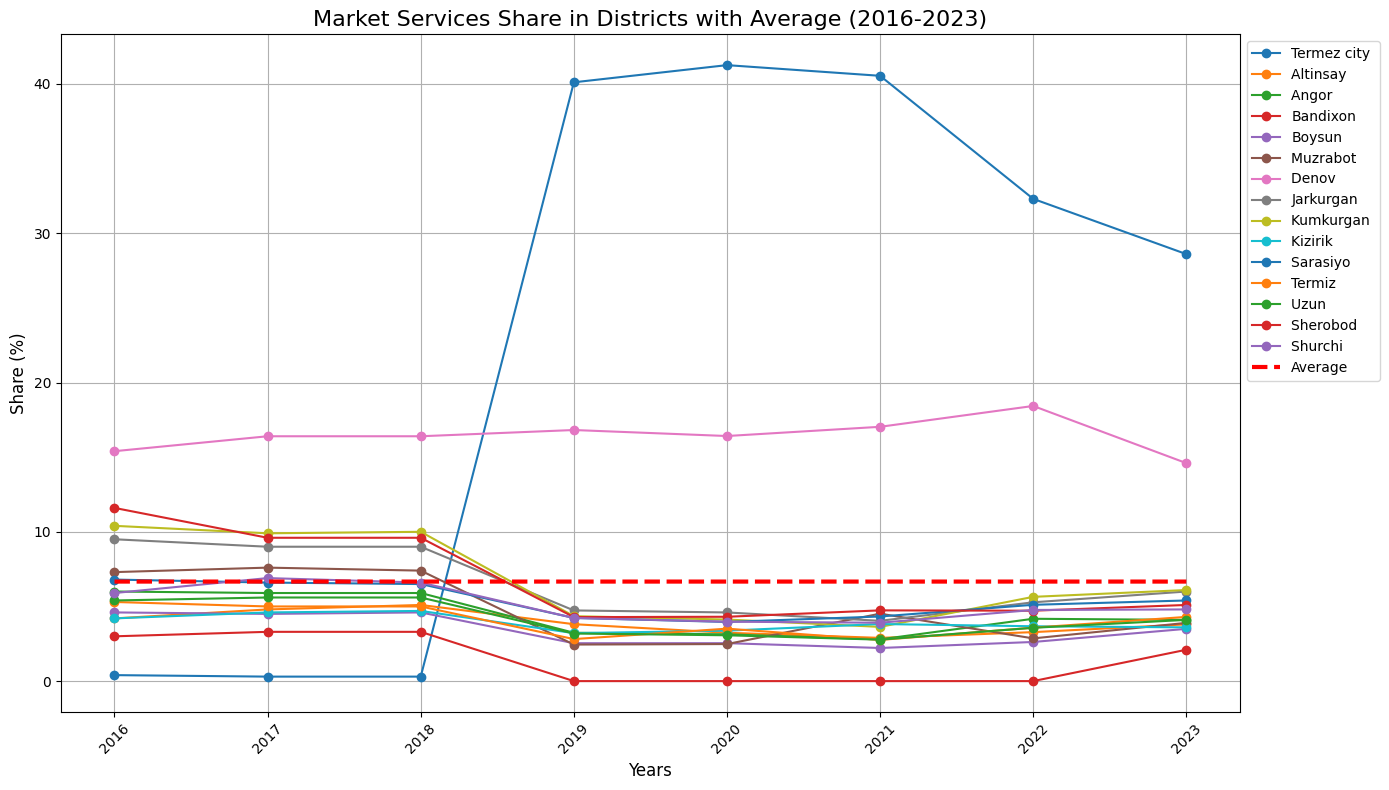

In [9]:
# Extract and clean the "Market Services" data
# Adjust slicing based on the structure of the data
market_services_data = districts_data.iloc[4:, [0, 18, 19, 20, 21, 22, 23, 24, 25]]  # Adjust column indices for Market Services
market_services_data.columns = ['District', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
market_services_data = market_services_data.dropna(how='all').reset_index(drop=True)

# Ensure the District column contains valid strings
market_services_data['District'] = market_services_data['District'].astype(str)

# Convert numerical columns to float for plotting
for col in market_services_data.columns[1:]:
    market_services_data[col] = pd.to_numeric(market_services_data[col], errors='coerce')

# Calculate the average for each year across all districts
market_services_avg_values = market_services_data.iloc[:, 1:].mean(axis=0)

# Plotting the "Market Services" share for all districts
plt.figure(figsize=(14, 8))

# Plot individual districts
for i in range(len(market_services_data)):
    district = market_services_data.iloc[i]
    district_name = district['District']  # Use the district name as the label
    values = district.iloc[1:].astype(float)
    plt.plot(market_services_data.columns[1:], values, marker='o', label=district_name)

# Plot the average (make it wider for visibility)
plt.plot(market_services_data.columns[1:], market_services_avg_values, color='red', linewidth=3, linestyle='--', label='Average')

# Add plot titles and labels
plt.title('Market Services Share in Districts with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



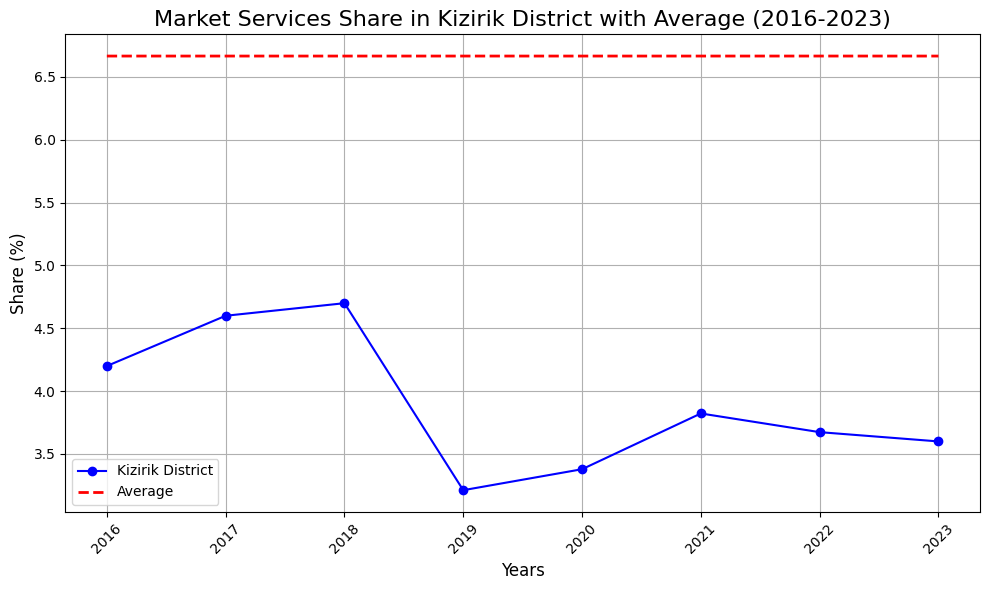

In [10]:
# Filter data for the Kizirik district
kizirik_market_services_data = market_services_data[market_services_data['District'].str.contains('Kizirik', case=False, na=False)]

# Plot the "Market Services" share for the Kizirik district with the average line
plt.figure(figsize=(10, 6))

if not kizirik_market_services_data.empty:
    # Plot Kizirik district data
    values = kizirik_market_services_data.iloc[0, 1:].astype(float)
    plt.plot(market_services_data.columns[1:], values, marker='o', label='Kizirik District', color='blue')
    
    # Plot the average line
    plt.plot(market_services_data.columns[1:], market_services_avg_values, color='red', linewidth=2, linestyle='--', label='Average')
else:
    print("Kizirik District data not found.")

# Add plot titles and labels
plt.title('Market Services Share in Kizirik District with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



### Export

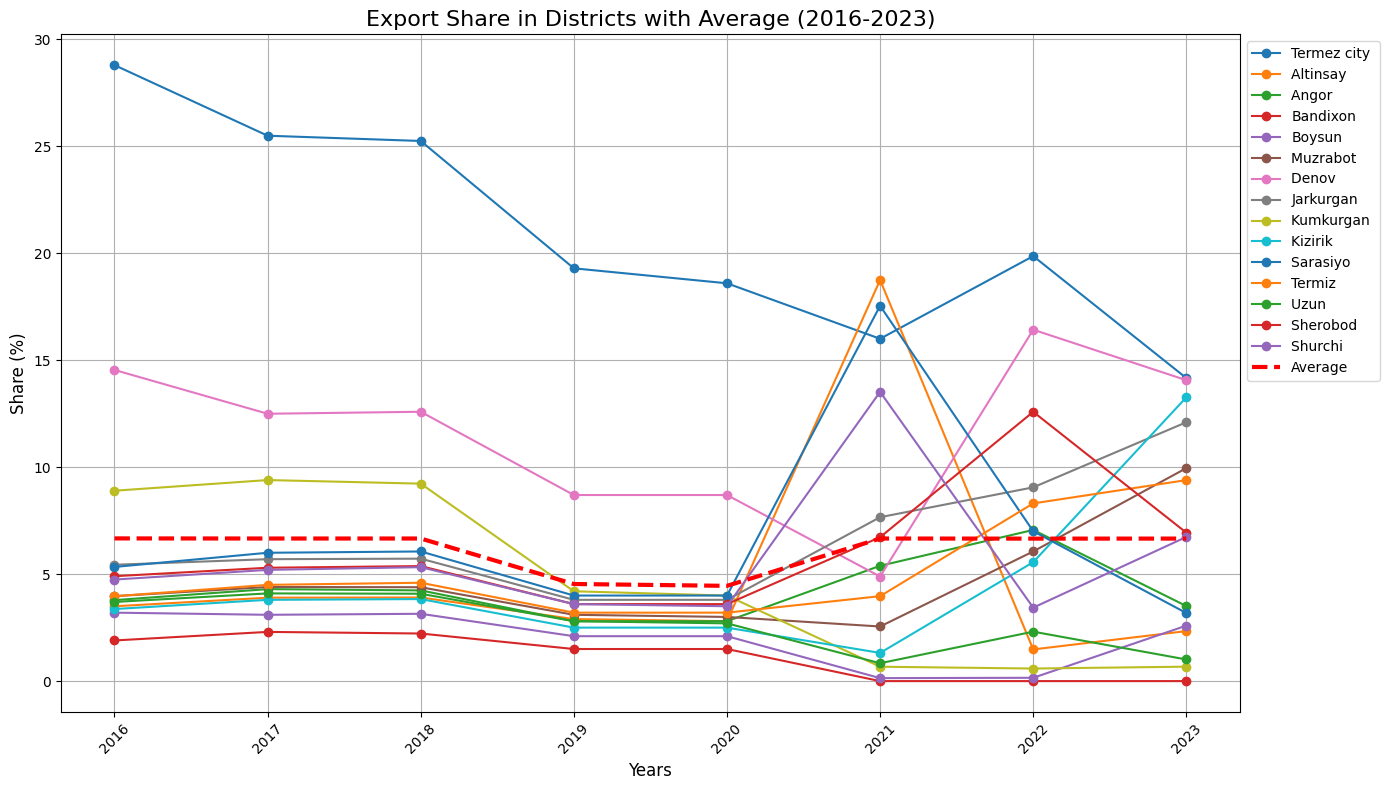

In [11]:
# Extract and clean the "Export" data
# Adjust slicing based on the structure of the data
export_data = districts_data.iloc[4:, [0, 26, 27, 28, 29, 30, 31, 32, 33]]  # Adjust column indices for Export
export_data.columns = ['District', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
export_data = export_data.dropna(how='all').reset_index(drop=True)

# Ensure the District column contains valid strings
export_data['District'] = export_data['District'].astype(str)

# Convert numerical columns to float for plotting
for col in export_data.columns[1:]:
    export_data[col] = pd.to_numeric(export_data[col], errors='coerce')

# Calculate the average for each year across all districts
export_avg_values = export_data.iloc[:, 1:].mean(axis=0)

# Plotting the "Export" share for all districts
plt.figure(figsize=(14, 8))

# Plot individual districts
for i in range(len(export_data)):
    district = export_data.iloc[i]
    district_name = district['District']  # Use the district name as the label
    values = district.iloc[1:].astype(float)
    plt.plot(export_data.columns[1:], values, marker='o', label=district_name)

# Plot the average (make it wider for visibility)
plt.plot(export_data.columns[1:], export_avg_values, color='red', linewidth=3, linestyle='--', label='Average')

# Add plot titles and labels
plt.title('Export Share in Districts with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



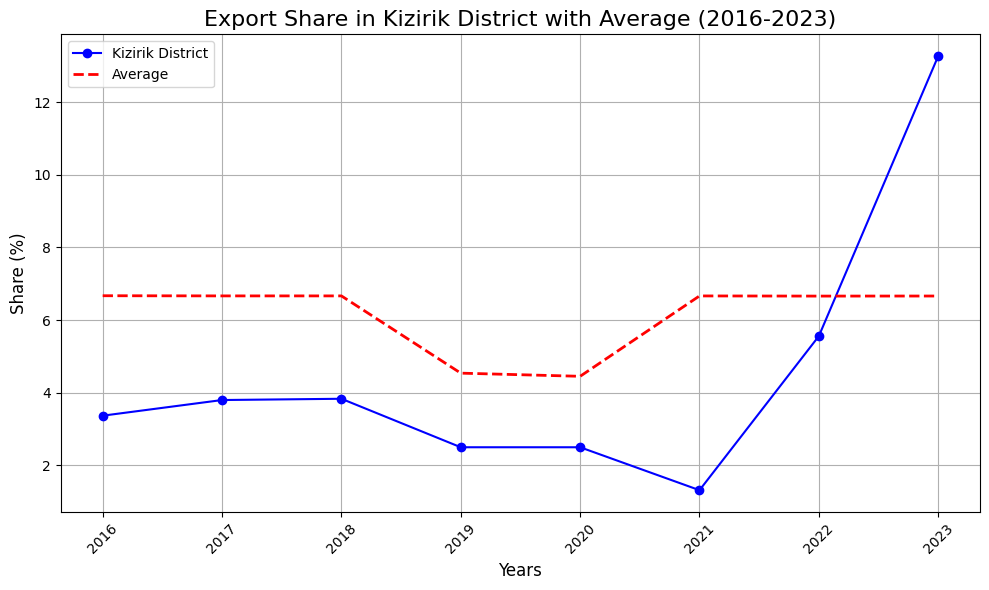

In [12]:
# Filter data for the Kizirik district
kizirik_export_data = export_data[export_data['District'].str.contains('Kizirik', case=False, na=False)]

# Plot the "Export" share for the Kizirik district with the average line
plt.figure(figsize=(10, 6))

if not kizirik_export_data.empty:
    # Plot Kizirik district data
    values = kizirik_export_data.iloc[0, 1:].astype(float)
    plt.plot(export_data.columns[1:], values, marker='o', label='Kizirik District', color='blue')
    
    # Plot the average line
    plt.plot(export_data.columns[1:], export_avg_values, color='red', linewidth=2, linestyle='--', label='Average')
else:
    print("Kizirik District data not found.")

# Add plot titles and labels
plt.title('Export Share in Kizirik District with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



# 4 Per Capita

/Users/david/Desktop/yesu/venv/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: #NAME?.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Skipping district Bandixon due to missing data.


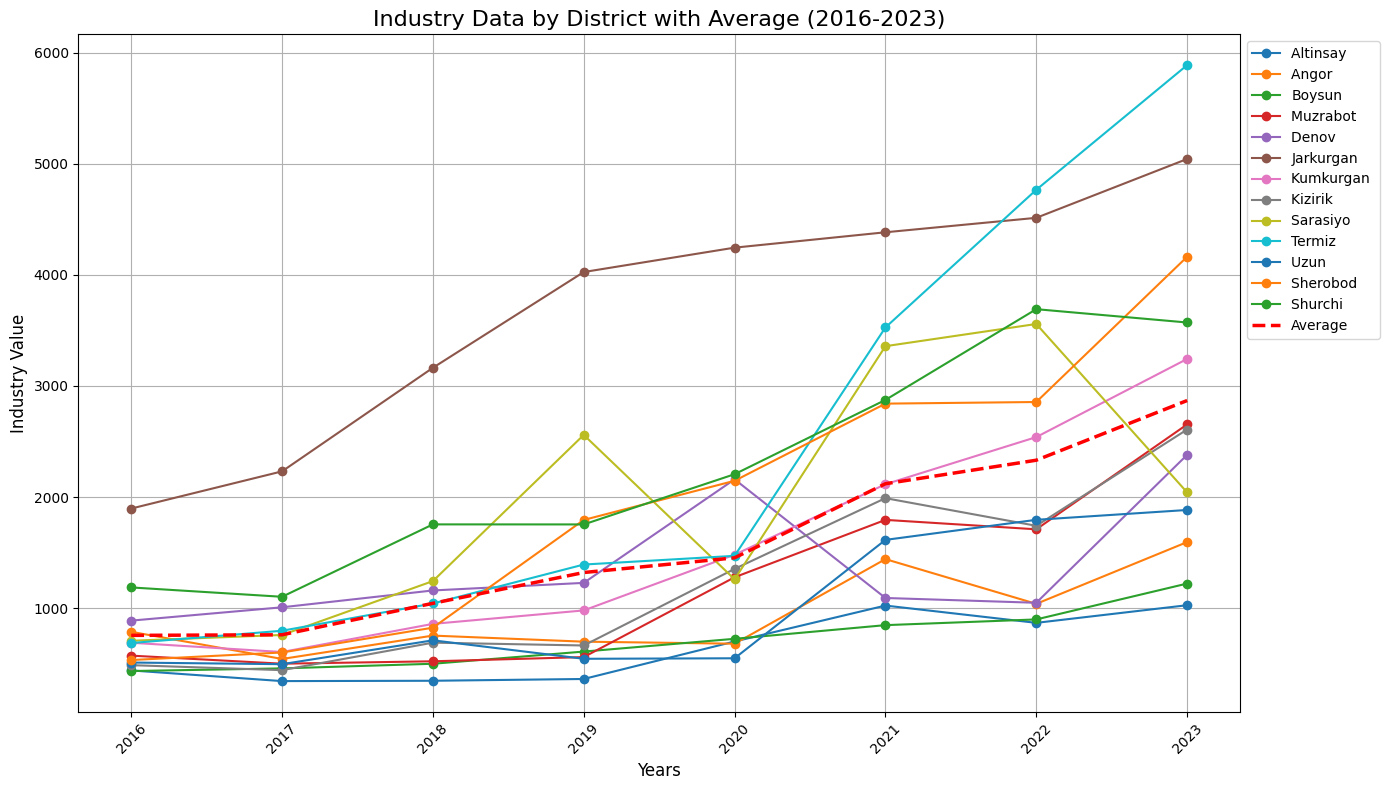

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the "1.4 per capita" sheet and skip irrelevant rows
per_capita_data = pd.read_excel('data.xlsx', sheet_name='1.4 per capita', skiprows=6)


# Select only the first 10 relevant columns (adjust based on your dataset)
relevant_columns = per_capita_data.iloc[:, :10]
relevant_columns.columns = ['District', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Jan-Sep 2023']

# Drop rows with totals or irrelevant data
relevant_columns = relevant_columns[~relevant_columns['District'].str.contains('Total', na=False)]

# Convert numeric columns to proper types
numeric_columns = relevant_columns.columns[1:]
for col in numeric_columns:
    relevant_columns[col] = pd.to_numeric(relevant_columns[col].astype(str).str.replace(',', '.'), errors='coerce')

# Calculate average values for each year
average_values = relevant_columns.iloc[:, 1:9].mean(axis=0)

# Plot per capita data for all districts
plt.figure(figsize=(14, 8))
for i in range(len(relevant_columns)):
    district_name = relevant_columns.iloc[i, 0]
    values = relevant_columns.iloc[i, 1:9].astype(float)  # Extract 2016-2023 data
    if len(values.dropna()) == 8:  # Ensure no missing values
        plt.plot(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], values, marker='o', label=district_name)
    else:
        print(f"Skipping district {district_name} due to missing data.")

# Plot the average line
plt.plot(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], average_values, color='red', linewidth=2.5, linestyle='--', label='Average')

plt.title('Industry Data by District with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Industry Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


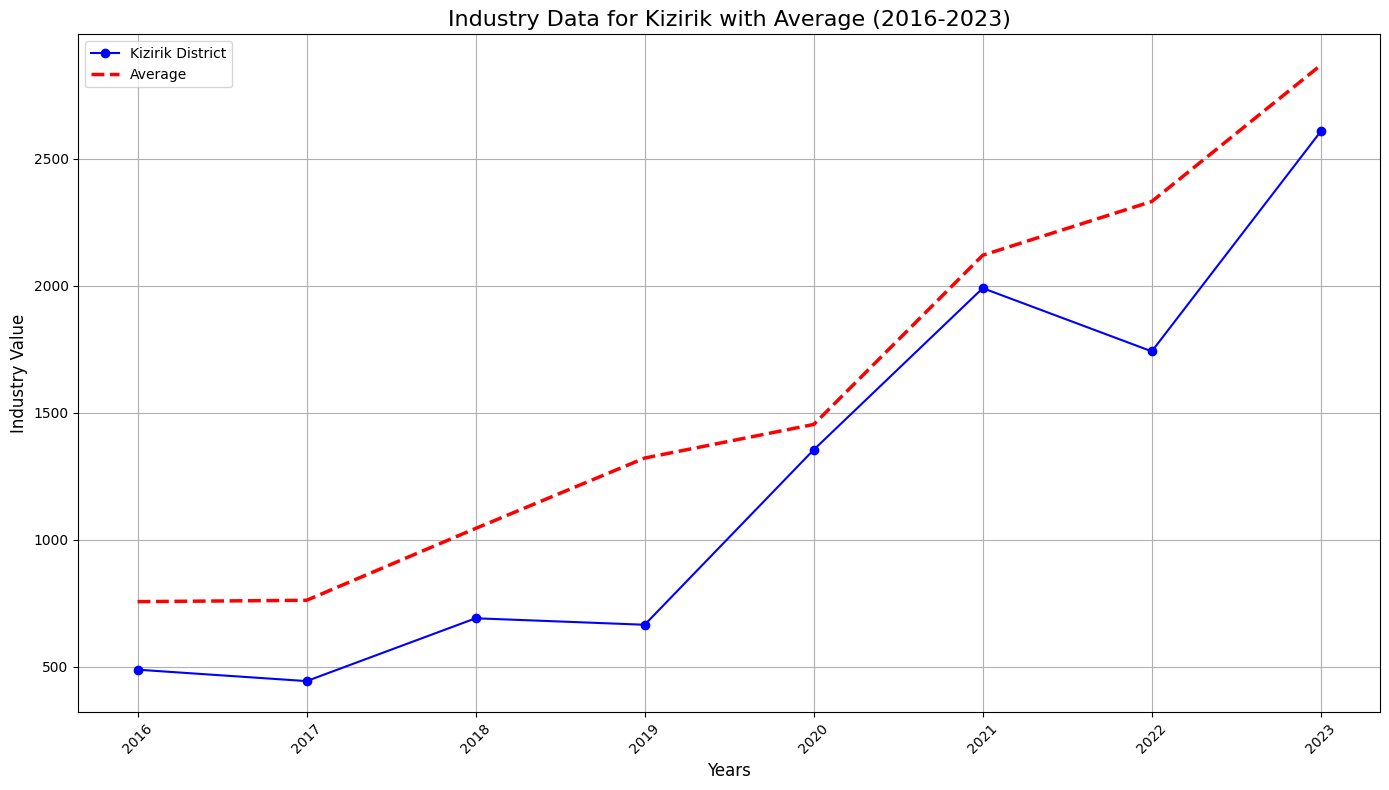

In [19]:
# Filter data for Kizirik district
kizirik_data = relevant_columns[relevant_columns['District'].str.contains("Kizirik", case=False, na=False)]

# Plot data for Kizirik and the average
plt.figure(figsize=(14, 8))

# Plot Kizirik district data
if not kizirik_data.empty:
    kizirik_values = kizirik_data.iloc[0, 1:9].astype(float)  # Extract 2016-2023 data
    plt.plot(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], kizirik_values, marker='o', label='Kizirik District', color='blue')
else:
    print("Kizirik data not found.")

# Plot the average line
plt.plot(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], average_values, color='red', linewidth=2.5, linestyle='--', label='Average')

# Add titles and labels
plt.title('Industry Data for Kizirik with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Industry Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


### Agriculture

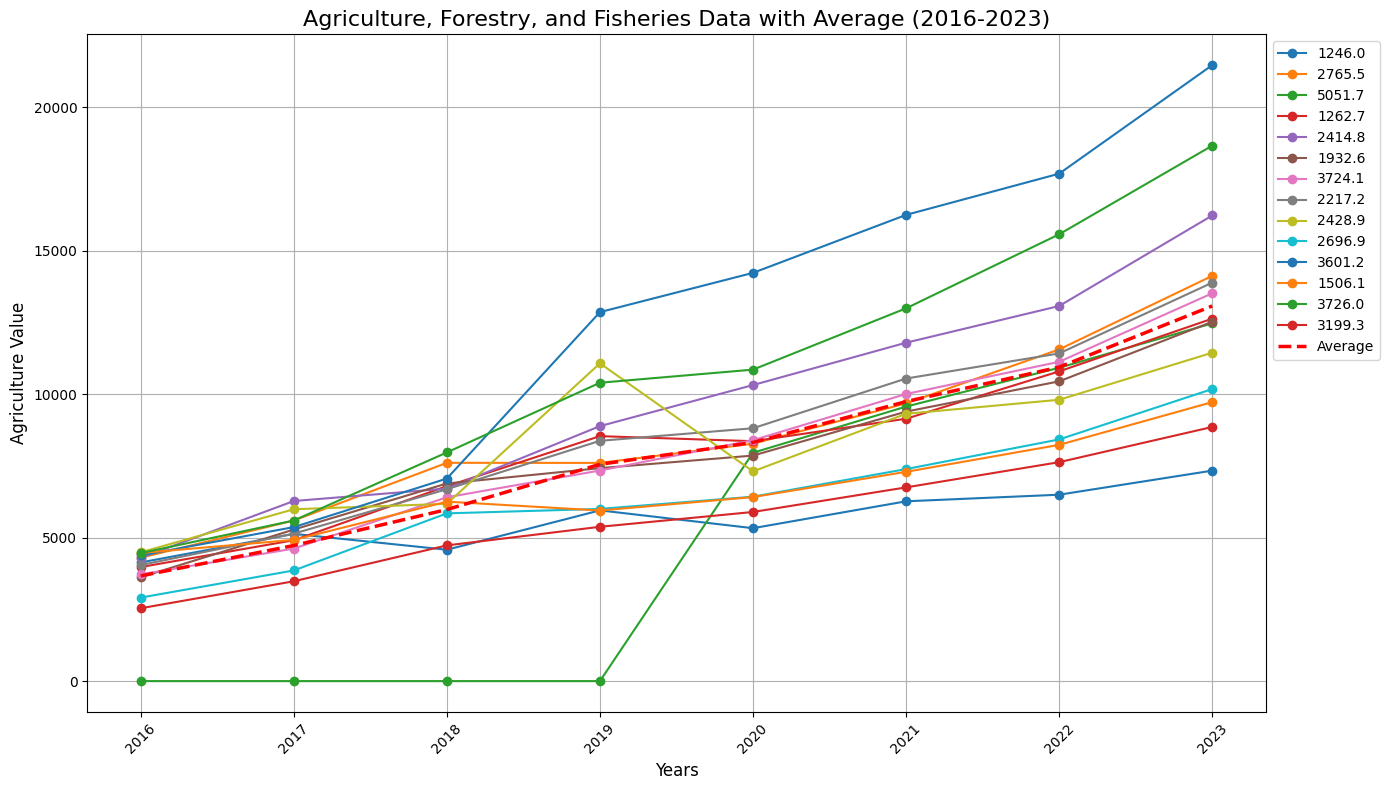

In [47]:
# Adjust column slicing for Agriculture data
# Ensure the District column contains valid strings
agriculture_data['District'] = agriculture_data['District'].astype(str).str.strip()  # Remove extra spaces
agriculture_columns = agriculture_data.columns
# Calculate average values for Agriculture
average_agriculture_values = agriculture_data.iloc[:, 1:].mean(axis=0)

# Plot data for all districts in Agriculture
plt.figure(figsize=(14, 8))
for i in range(len(agriculture_data)):
    district_name = agriculture_data.iloc[i, 0]  # District name
    values = agriculture_data.iloc[i, 1:].astype(float)  # Extract data for 2016-2023
    if len(values.dropna()) == 8:  # Ensure complete data
        plt.plot(agriculture_columns[1:], values, marker='o', label=district_name)
    else:
        print(f"Skipping district {district_name} due to missing data.")

# Plot the average line
plt.plot(agriculture_columns[1:], average_agriculture_values, color='red', linewidth=2.5, linestyle='--', label='Average')

# Add titles and labels
plt.title('Agriculture, Forestry, and Fisheries Data with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Agriculture Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


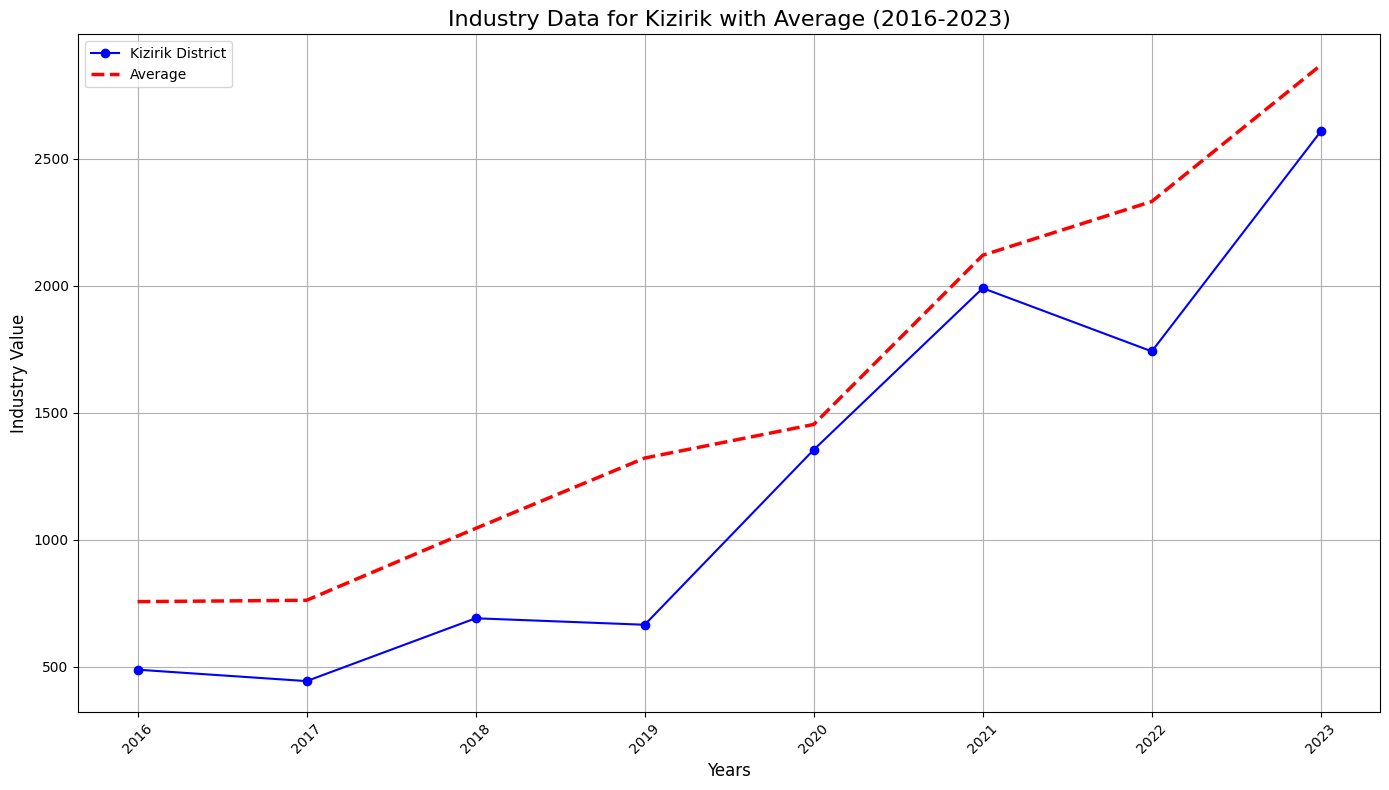

In [49]:
# Filter data for Kizirik district
kizirik_data = relevant_columns[relevant_columns['District'].str.contains("Kizirik", case=False, na=False)]

# Plot data for Kizirik and the average
plt.figure(figsize=(14, 8))

# Plot Kizirik district data
if not kizirik_data.empty:
    kizirik_values = kizirik_data.iloc[0, 1:9].astype(float)  # Extract 2016-2023 data
    plt.plot(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], kizirik_values, marker='o', label='Kizirik District', color='blue')
else:
    print("Kizirik data not found.")

# Plot the average line
plt.plot(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], average_values, color='red', linewidth=2.5, linestyle='--', label='Average')

# Add titles and labels
plt.title('Industry Data for Kizirik with Average (2016-2023)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Industry Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()
